# `snow_partitioning_parallel`
Similar to `snow_partitioning` except that it performs SNOW algorithm in parallel and serial mode to save computational time and memory requirement respectively.    

## Import packages

In [1]:
import numpy as np
import porespy as ps
from porespy.tools import randomize_colors
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import time

np.random.seed(10)

## `im`
Works on 2D and 3D images. We use 2D here because it is easier to visualize.

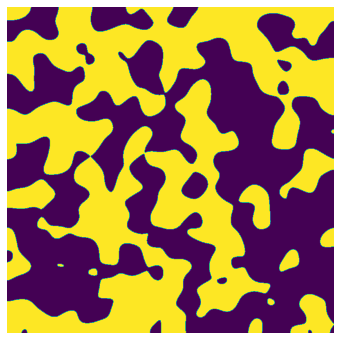

In [2]:
im = ps.generators.blobs(shape=[800, 800])

plt.figure(figsize=[6, 6])
plt.axis(False)
plt.imshow(im); 

## `overlap`, `divs`, and `cores`
 `cores` is the number of cores to use. The more cores the faster the `snow_partitioning` performs. If `overlap` is None it is estimated using `porespy.tools.estimate_overlap` method. The domain is divided by 2 in each direction as supplied to `divs`.

In [3]:
start = time.time()
x1 = ps.filters.snow_partitioning_parallel(im, r_max=5, sigma=0.4, divs=2, overlap=None, cores=1)
pause = time.time()
x2 = ps.filters.snow_partitioning_parallel(im, r_max=5, sigma=0.4, divs=2, overlap=None, cores=4)
stop = time.time()

print('OPERATION TIME:')
print('cores=1:', pause-start, 'seconds')
print('cores=4:', stop-pause, 'seconds')

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

OPERATION TIME:
cores=1: 2.1145806312561035 seconds
cores=4: 0.27266740798950195 seconds


The snow algorithm returns several images

In [4]:
print(x1)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Item                      Description
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
im                        Image of size (800, 800)
dt                        Image of size (800, 800)
regions                   Image of size (800, 800)
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


Plot the results

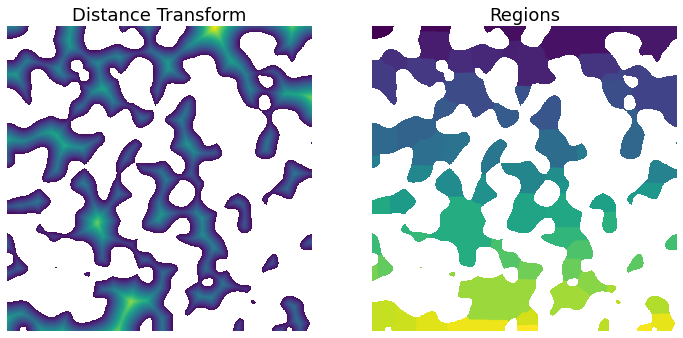

In [5]:
fix, ax = plt.subplots(1, 2, figsize=[12, 12])
ax[0].axis(False)
ax[0].imshow(x1.dt/im)
ax[0].set_title('Distance Transform', fontdict={'fontsize': 18});
ax[1].axis(False)
ax[1].imshow(x1.regions/im);
ax[1].set_title('Regions', fontdict={'fontsize': 18});